### Two categories of geographical data

1. Spatial object: shape and spatial extent matters, map is the main object of interest
 * countries, regions, buildings
2. Non-Spatial geolocated Objects: shape and map does not matter
 * cars, people, weather stations. The role of the map is to only be a reference to see where these objects or phenomena are located

### When/Why to use map

1. When the question is inherently spacial (map vs bar chart)
 * correlate the variable with the spacial location (bikes and subway)
     * [John Snow's Cholera map](https://www1.udel.edu/johnmack/frec682/cholera/cholera2.html) (death near water pump)
 * phenomena for which spacial proximity is relevant
     * how far has epidemic extended from its point of origin
     * the rate of infected people in neighboring regions
2. When the map helps find information needed (electoral maps)

### Types of maps

1. Dot Map
 * distribution of objects (density and distribution)
2. Heat Maps
 * distribution of continuous values
3. Binned Maps
 * distribution of discrete or arbitrary values
4. Choropleth Mapth
 * distribution of discrete and/or geo values
5. Symbol Maps
 * distribution of discrete and/or geo values

### Issues with maps

1. normalize data
2. insensitivity to sample size

> In probability theory, the law of large numbers (LLN) is a theorem that describes the result of performing the same experiment a large number of times. According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed. [link to wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

3. skewed spatial distributions
 * color intensity is percieved differently by size
4. color perception
 * framing bias

[link 1](https://www.eyesocialeyes.com/wp-content/uploads/2016/03/darker-moving.gif)  
[link 2](http://brainden.com/images/dots-big.gif)

### Introduction

## Plotly

### Choropleth Mapth

In [ ]:
from plotly.offline import plot, iplot
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

In [ ]:
df.shape

(50, 17)

In [ ]:
df.head()

code       state category  total exports   beef  pork  poultry   dairy  \
0   AL     Alabama    state        1390.63   34.4  10.6    481.0    4.06   
1   AK      Alaska    state          13.31    0.2   0.1      0.0    0.19   
2   AZ     Arizona    state        1463.17   71.3  17.9      0.0  105.48   
3   AR    Arkansas    state        3586.02   53.2  29.4    562.9    3.53   
4   CA  California    state       16472.88  228.7  11.1    225.4  929.95   

   fruits fresh  fruits proc  total fruits  veggies fresh  veggies proc  \
0           8.0         17.1         25.11            5.5           8.9   
1           0.0          0.0          0.00            0.6           1.0   
2          19.3         41.0         60.27          147.5         239.4   
3           2.2          4.7          6.88            4.4           7.1   
4        2791.8       5944.6       8736.40          803.2        1303.5   

   total veggies  corn  wheat   cotton  
0          14.33  34.9   70.0   317.61  
1           1.56   0.0    0.0     0.00  
2         386.91   7.3   48.7   423.95  
3          11.45  69.5  114.5   665.44  
4        2106.79  34.6  249.3  1064.95

In [ ]:
for col in df.columns:
    df[col] = df[col].astype(str)

df['text'] = df['state'] + '<br>' + \
    'Beef ' + df['beef'] + ' Dairy ' + df['dairy'] + '<br>' + \
    'Fruits ' + df['total fruits'] + ' Veggies ' + df['total veggies'] + '<br>' + \
    'Wheat ' + df['wheat'] + ' Corn ' + df['corn']

In [ ]:
data = [go.Choropleth(
    locations = df['code'],
    z = df['total exports'].astype(float),
    locationmode = 'USA-states',
    text = df['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Millions USD")
)]

layout = go.Layout(
    geo = go.layout.Geo(
        scope = 'usa',
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)

In [ ]:
iplot(fig)

### Dot Map

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df.head()

df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

data = [ go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            cmin = 0,
            color = df['cnt'],
            cmax = df['cnt'].max(),
            colorbar=dict(
                title="Incoming flights<br>February 2011"
            )
        ))]

layout = dict(
        title = 'Most trafficked US airports<br>(Hover for airport names)', 
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = go.Figure(data=data, layout=layout )

In [ ]:
iplot(fig, filename='d3-airports')

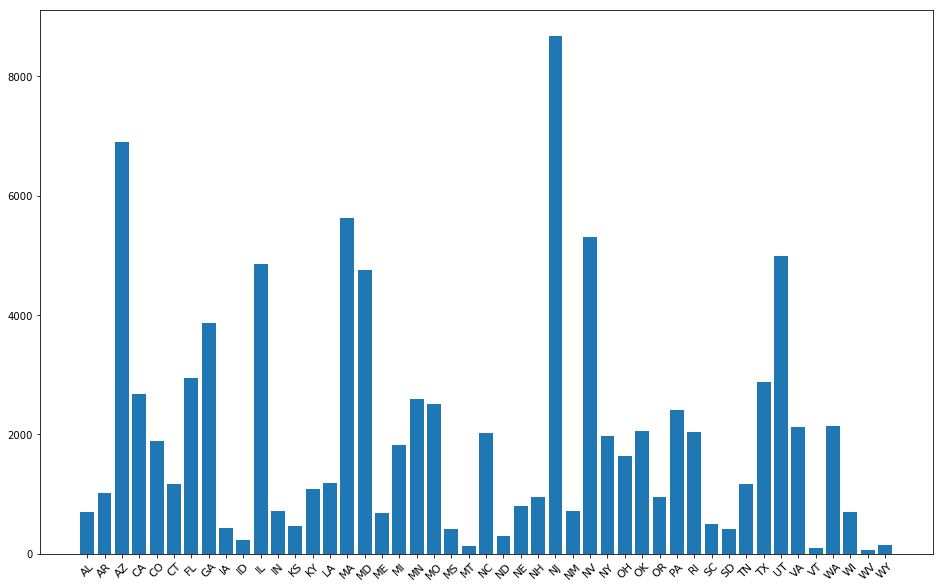

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
plt.bar(np.arange(df["state"].nunique()), df.groupby("state").sum()["cnt"]/df.groupby("state").count()["cnt"])
plt.xticks(np.arange(df["state"].nunique()), df.groupby("state").sum()["cnt"].index, rotation = 45, size = 11);

### Symbol Maps

In [1]:
df

NameError: ignored

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = go.Layout(
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=cities, layout=layout)

In [ ]:
iplot(fig, filename='d3-bubble-map-populations')

## Folium

In [ ]:
import folium
import json
import numpy as np
import pandas as pd

In [ ]:
m = folium.Map(location=[40.2, 44.6])
m

In [ ]:
armenia_border = json.load(open("./gadm36_ARM_1.json"))

In [ ]:
armenia_border

{'type': 'FeatureCollection',
 'name': 'gadm36_ARM_1',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'tessellate': -1,
    'extrude': 0,
    'visibility': -1,
    'NAME_0': 'Armenia',
    'NAME_1': 'Aragatsotn'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[44.4400100708008, 40.6879425048829],
       [44.4386672973633, 40.6812248229982],
       [44.4504966735841, 40.6717605590821],
       [44.4646949768066, 40.656379699707],
       [44.4729766845703, 40.6398162841797],
       [44.49072265625, 40.6256217956543],
       [44.4990043640136, 40.6149711608887],
       [44.5084686279297, 40.6078720092775],
       [44.5380477905273, 40.6007766723633],
       [44.5664405822754, 40.5984077453614],
       [44.5889205932618, 40.5936775207521],
       [44.5948333740236, 40.5936775207521],
       [44.5924682617188, 40.5747451782227],
       [44.5841865539551, 40.5510864257812],
       [44.568

In [ ]:
armenia_border["features"][0]["properties"]["NAME_1"]

'Aragatsotn'

In [ ]:
m = folium.Map(location=[40.2, 44.6])
folium.GeoJson(armenia_border).add_to(m)
m

In [ ]:
armenia_wiki = pd.read_html("https://en.wikipedia.org/wiki/Armenia")

In [ ]:
armenia_population = armenia_wiki[2]

In [ ]:
armenia_population.columns = ["province_eng", "province_arm", "capital_eng", "capital_arm", "area", "population"]

In [ ]:
armenia_population["population_density"] = armenia_population.population/armenia_population.area

In [ ]:
armenia_population

province_eng province_arm   capital_eng capital_arm  area  population  \
0    Aragatsotn    Արագածոտն      Ashtarak     Աշտարակ  2756      132925   
1        Ararat       Արարատ      Artashat     Արտաշատ  2090      260367   
2       Armavir      Արմավիր       Armavir     Արմավիր  1242      265770   
3   Gegharkunik  Գեղարքունիք         Gavar       Գավառ  5349      235075   
4        Kotayk       Կոտայք       Hrazdan     Հրազդան  2086      254397   
5          Lori         Լոռի      Vanadzor     Վանաձոր  3799      235537   
6        Shirak        Շիրակ        Gyumri     Գյումրի  2680      251941   
7        Syunik      Սյունիք         Kapan       Կապան  4506      141771   
8        Tavush       Տավուշ        Ijevan       Իջևան  2704      128609   
9   Vayots Dzor    Վայոց Ձոր  Yeghegnadzor   Եղեգնաձոր  2308       52324   
10      Yerevan        Երևան             –           –   223     1060138   

    population_density  
0            48.231132  
1           124.577512  
2           213.985507  
3            43.947467  
4           121.954458  
5            61.999737  
6            94.007836  
7            31.462716  
8            47.562500  
9            22.670711  
10         4753.982063

In [ ]:
m = folium.Map(location=[40.2, 44.6])
folium.Choropleth(geo_data = armenia_border, data = armenia_population,
                      columns = ["province_eng", "population"],
             fill_color='YlGnBu',
                  key_on = "feature.properties.NAME_1",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True
                 ).add_to(m)
m

In [ ]:
m = folium.Map(location=[40.2, 44.6])
folium.Choropleth(geo_data = armenia_border, data = armenia_population,
                      columns = ["province_eng", "population_density"],
             fill_color='Blues',
                  key_on = "feature.properties.NAME_1",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True
                 ).add_to(m)
m

In [ ]:
geo_json_data = json.load(open("us-counties.json"))

In [ ]:
m = folium.Map([43, -100], zoom_start=4)
folium.GeoJson(geo_json_data).add_to(m)
m

In [ ]:
df = []
for i in range(len(geo_json_data["features"])):
    df.append([geo_json_data["features"][i]["id"], np.random.normal(10000, 50000)])

In [ ]:
df = pd.DataFrame(df, columns=["location", "value"])

In [ ]:
m = folium.Map(location=[43, -100], zoom_start=4)

In [ ]:
folium.Choropleth(geo_data = geo_json_data, data = df,
                      columns = ["location", "value"],
             fill_color='YlGnBu',
                  key_on = "feature.id",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True
                 ).add_to(m)

In [ ]:
m

In [ ]:
bins = list(df['value'].quantile(np.linspace(0, 1, 11)))

In [ ]:
m = folium.Map(location=[43, -100], zoom_start=4)

folium.Choropleth(geo_data = geo_json_data, data = df,
                      columns = ["location", "value"],
             fill_color='RdYlBu',
                  key_on = "feature.id",
               fill_opacity=0.7, line_opacity=0.2,
                 highlight = True, bins = bins
                 ).add_to(m)

In [ ]:
m

More about [colorbrew](https://github.com/dsc/colorbrewer-python)

### Adding Markers

In [ ]:
import folium
import pandas as pd
 
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
 

m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)
 

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']], popup=data.iloc[i]['name']).add_to(m)

In [ ]:
m

## Adding pattern styles

In [ ]:
import folium
from folium import plugins

In [ ]:
m = folium.Map([40., -105.], zoom_start=4)

remote_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
stripes = plugins.pattern.StripePattern(angle=-45)
stripes.add_to(m)

circles = plugins.pattern.CirclePattern(width=20, height=20, radius=5, fill_opacity=0.5, opacity=1)
circles.add_to(m)

def style_function(feature):
    default_style = {
        'opacity':1.0,
        'fillColor': '#ffff00',
        'color': 'black',
        'weight': 2
    }
        
    if feature['properties']['name']  == 'Texas':
        default_style['fillPattern'] = stripes
        default_style['fillOpacity'] = 1.0
        
    if feature['properties']['name']  == 'California':
        default_style['fillPattern'] = circles
        default_style['fillOpacity'] = 1.0
        
    return default_style

# Adding remote GeoJSON as additional layer.
folium.GeoJson(remote_url, smooth_factor=0.5, style_function=style_function).add_to(m)

m

## Time

In [ ]:
import folium

In [4]:
import geopandas as gpd
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

In [ ]:
import pandas as pd

n_periods, n_sample = 48, 40

datetime_index = pd.date_range('2016-1-1', periods=n_periods, freq='M')
dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = dt_index_epochs.astype('U10')

dt_index

Index(['1454198400', '1456704000', '1459382400', '1461974400', '1464652800',
       '1467244800', '1469923200', '1472601600', '1475193600', '1477872000',
       '1480464000', '1483142400', '1485820800', '1488240000', '1490918400',
       '1493510400', '1496188800', '1498780800', '1501459200', '1504137600',
       '1506729600', '1509408000', '1512000000', '1514678400', '1517356800',
       '1519776000', '1522454400', '1525046400', '1527724800', '1530316800',
       '1532995200', '1535673600', '1538265600', '1540944000', '1543536000',
       '1546214400', '1548892800', '1551312000', '1553990400', '1556582400',
       '1559260800', '1561852800', '1564531200', '1567209600', '1569801600',
       '1572480000', '1575072000', '1577750400'],
      dtype='object')

In [ ]:
import numpy as np
np.random.seed(42)

styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df

In [ ]:
ax = df.plot()

In [ ]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [ ]:
from branca.colormap import linear
cmap = linear.PuRd_09.scale(min_color, max_color)


def norm(x):
    return (x - x.min()) / (x.max() - x.min())


for country, data in styledata.items():
    data['color'] = data['color'].apply(cmap)
    data['opacity'] = norm(data['opacity'])

In [ ]:
cmap

In [ ]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

In [ ]:
from folium.plugins import TimeSliderChoropleth

m = folium.Map([0, 0], zoom_start=2)

g = TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict
).add_to(m)

m

In [ ]:
m